In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("text_class - text_class.csv")

In [39]:
df

,text,label
0,"i loved the product, it's amazing!",positive
1,"terrible service, i will never shop here again.",negative
2,"the quality is good, but the delivery was late.",neutral
3,"absolutely wonderful experience, highly recomm...",positive
4,"product was damaged when it arrived, very disa...",negative
5,the customer support was very helpful and polite.,positive
6,worst purchase i've ever made.,negative
7,satisfied with the product but the price was t...,neutral


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8 non-null      object
 1   label   8 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes


In [17]:
# Print the total number of rows
print("Total number of rows:", len(df))

# Print the count of unique labels
print("Count of unique labels:", df[['text', 'label']].nunique())

Total number of rows: 8
Count of unique labels: text     8
label    3
dtype: int64


In [29]:
columns_to_lower = ['text', 'label']
for col in columns_to_lower:
    df[col] = df[col].str.lower()

In [31]:
df.head()

,text,label
0,"i loved the product, it's amazing!",positive
1,"terrible service, i will never shop here again.",negative
2,"the quality is good, but the delivery was late.",neutral
3,"absolutely wonderful experience, highly recomm...",positive
4,"product was damaged when it arrived, very disa...",negative


In [3]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)  # Join tokens back into a string


data = pd.read_csv("text_class - text_class.csv")

# Apply preprocessing to each text column
data['processed_text'] = data['text'].apply(preprocess_text)

# Display the processed dataset
print(data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text     label  \
0                 I loved the product, it's amazing!  positive   
1    Terrible service, I will never shop here again.  negative   
2    The quality is good, but the delivery was late.   neutral   
3  Absolutely wonderful experience, highly recomm...  positive   
4  Product was damaged when it arrived, very disa...  negative   
5  The customer support was very helpful and polite.  positive   
6                     Worst purchase I've ever made.  negative   
7  Satisfied with the product but the price was t...   neutral   

                                     processed_text  
0                             loved product amazing  
1                       terrible service never shop  
2                        quality good delivery late  
3  absolutely wonderful experience highly recommend  
4              product damaged arrived disappointed  
5                   customer support helpful polite  
6                      wors

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting data
X = data['processed_text'] 
y = data['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert text data to numerical representation (Bag-of-Words)
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Training model
model = LogisticRegression()
model.fit(X_train_vect, y_train)

# Prediction on test data
y_pred = model.predict(X_test_vect)

# Accuracy calculation and output
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.00%


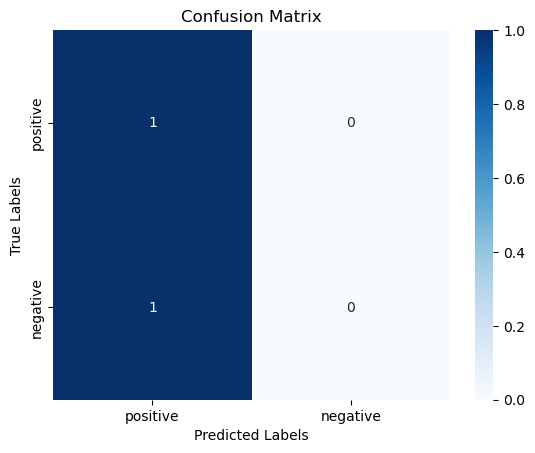

Classification Report:
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00         1
    negative       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\numan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\numan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\numan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# confision matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

# Display the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# classification report for performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['positive',  'negative']))

The confusion matrix provides detailed insights into the model's performance by showing the number of correct and incorrect predictions for each class. It helps identify specific areas where the model struggles, such as frequent misclassification between similar classes, enabling targeted improvements in data preprocessing or model refinement